In [1]:
import numpy as np
from mfdfa import hurst, basic_dfa

In [2]:
def geometric_randomwalk(n, initval, ratio):
    chices = np.random.choice([-1,1], size=n)
    return initval * np.cumprod(np.exp(chices * ratio))

data = geometric_randomwalk(1000, 100, 0.015)

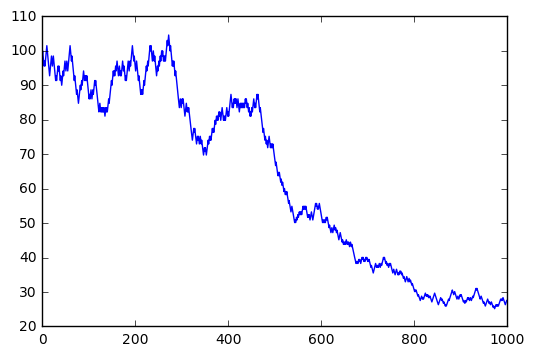

In [3]:
import matplotlib.pyplot as plt
plt.plot(data)

In [4]:
# Put raw time series data
hurst(data, skip_agg=True)

0.50514582284530729

In [5]:
# Put differential time series data
hurst(data[1:] - data[:-1])

0.50587437525040013

In [6]:
# Get generalized hust 
qorders = list(range(-9, 10))
generalized_hurst_expornents = basic_dfa(data, Q=qorders, skip_agg=True)

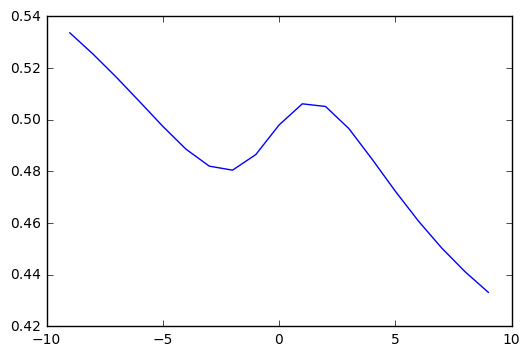

In [7]:
plt.plot(qorders, generalized_hurst_expornents)

In [10]:
for w in [256, 512, 1024]:
    results = []
    for i in range(0, 1000):
        results.append(hurst(geometric_randomwalk(w, 100, 0.015), skip_agg=True))
    print('window: ', w, 'avg: ', np.mean(results), 'std:', np.std(results))

window:  256 avg:  0.507415503098 std: 0.257659453033
window:  512 avg:  0.498891082955 std: 0.0797152850308
window:  1024 avg:  0.498196726794 std: 0.0615348292327
